In [61]:
# Import
from collections import defaultdict
import matplotlib.pyplot as pyt
import re

In [1082]:
import itertools as it

In [83]:
stopwords=open("stopwords.txt")
stop=[]
for i in stopwords:
    i=i.strip()
    stop.append(i)

In [87]:
import string
# Define tokenize function: input str output list of tokens
def tokenize(line):
    return line.split()
def better_tokenize(line):
    ls_word=[]
    for i in line.split():
        i=i.strip(string.punctuation)
        i=i.lower()
        ls_word.append(i)
    return ls_word

In [88]:
better_tokenize("sdas it's")

['sdas', "it's"]

In [89]:
train_x=open("X_train.txt")
train_y=open("y_train.txt")
dev_x=open("X_dev.txt")
dev_y=open("y_dev.txt")

In [90]:
# tokenize and development data
trainx=list()
trainy=list()
for line in train_x:
    line=tokenize(line)
    trainx.append(line)
for line in train_y:
    line=int(line)
    trainy.append(line)
# Development
devx=list()
devy=list()
for line in dev_x:
    line=tokenize(line)
    devx.append(line)
for line in dev_y:
    line=int(line)
    devy.append(line)

[]

In [677]:
# Counting bigrams
bigram=defaultdict(int)
for i in trainx:
    for j in range(len(i)-2+1):
        temp=tuple(i[j:j+2])
        bigram[temp]+=1

In [678]:
# Counting trigrams
trigram=defaultdict(int)
for i in trainx:
    for j in range(len(i)-3+1):
        temp=tuple(i[j:j+3])
        trigram[temp]+=1

In [745]:
# Couting unigrams
unigram=defaultdict(int)
for i in trainx:
    for j in i:
        unigram[j]+=1

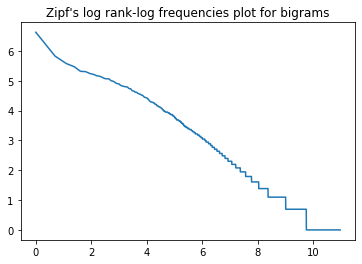

In [680]:
import math
# Plot the frequency against rank
frequencies=sorted(bigram.values(),reverse=True)
rank=list(range(1,len(frequencies)+1))
pyt.plot(list(map(math.log,rank)),list(map(math.log,frequencies)))
pyt.title("Zipf's log rank-log frequencies plot for bigrams")
_=pyt.show()

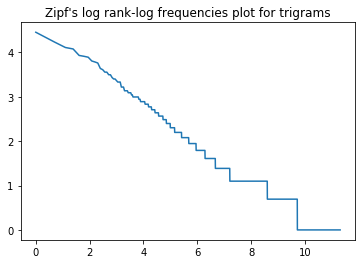

In [681]:
frequencies_tri=sorted(trigram.values(),reverse=True)
rank_tri=list(range(1,len(frequencies_tri)+1))
pyt.plot(list(map(math.log,rank_tri)),list(map(math.log,frequencies_tri)))
pyt.title("Zipf's log rank-log frequencies plot for trigrams")
_=pyt.show()

In [664]:
#count_bigram,count_trigram,count_unigram=0,0,0
#for i in devx:
 #   for t in i:
  #      if unigram[t]==0: count_unigram+=1
   # for j in it.combinations(i,2):
    #    if bigram[j]==0: count_bigram+=1
    #for k in it.combinations(i,3):
     #   if trigram[k]==0: count_trigram+=1

In [1085]:
#print("There are ",count_unigram,"unigrams in the development data which did not appear in the training data\n",
 #     "There are",count_bigram,"bigrams in the development data which did not appear in the training data\n",
  #    "There are",count_trigram,"trigrams in the development data which did not appear in the training data"
   #  )

In [1086]:
# Try 5 as the threhold for both
def token_(list_,bigram,trigram):
    list_=better_tokenize(list_)
    ls_word=[]
    for i in list_:
        ls_word.append(i)
    for i in range(len(list_)-2+1):
        if bigram[tuple(list_[i:i+2])]>=5:
            ls_word.append(tuple(list_[i:i+2]))
    for i in range(len(list_)-3+1):
        if trigram[tuple(list_[i:i+3])]>=5:
            ls_word.append(tuple(list_[i:i+3]))
    return ls_word

In [1381]:

train_x=open("X_train.txt")
train_y=open("y_train.txt")
dev_x=open("X_dev.txt")
dev_y=open("y_dev.txt")
trainx_=list()
for line in train_x:
    line=token_(line,bigram,trigram)
    trainx_.append(line)
# Development
devx_=list()
for line in dev_x:
    line=token_(line,bigram,trigram)
    devx_.append(line)

In [1517]:
# Define train function: input training data, smoothing_aplha output probabilities
# Size [Size, SizePositive, SizeNegative]
def train(trainx,trainy):
    length=len(trainx)
    # Train data should be n*list 
    TotalWordsYes,TotalWordsNo,TotalWords=0,0,0
    NumberofP,NumberofN=0,0
    dictFeatures,dictFeaturesYes, dictFeaturesNo=defaultdict(int),defaultdict(int),defaultdict(int)
    for i in range(length):
        # For each list of token
        # If y is 1
        if trainy[i]==1:
            # Positive tweets+=1
            NumberofP+=1
            # dive into every list of token
            for j in range(len(trainx[i])):
                # For every feature
                f=trainx[i][j]
                dictFeatures[f]+=1
                dictFeaturesYes[f]+=1
                TotalWordsYes+=1
                TotalWords+=1
        else:
            # Negative tweets+=1
            NumberofN+=1
            for j in range(len(trainx[i])):
                f=trainx[i][j]
                dictFeatures[f]+=1
                dictFeaturesNo[f]+=1
                TotalWordsNo+=1
                TotalWords+=1
    dictTweets={"0":NumberofN/length,"1":NumberofP/length}
    return dictFeatures,dictFeaturesYes,dictFeaturesNo,TotalWordsYes,TotalWordsNo,TotalWords,dictTweets
    
        

In [1503]:
def train(trainx,trainy):
    length=len(trainx)
    # Train data should be n*list 
    NumberofP,NumberofN=0,0
    dictFeatures,dictFeaturesYes, dictFeaturesNo=defaultdict(int),defaultdict(int),defaultdict(int)
    for i in range(length):
        # For each list of token
        # If y is 1
        if trainy[i]==1:
            # Positive tweets+=1
            NumberofP+=1
            # dive into every list of token
            temp=set(trainx[i])
            for j in temp:
                # For every feature
                dictFeatures[j]+=1
                dictFeaturesYes[j]+=1
                dictFeaturesNo[j]+=0
        else:
            # Negative tweets+=1
            NumberofN+=1
            temp=set(trainx[i])
            for j in temp:
                dictFeatures[j]+=1
                dictFeaturesNo[j]+=1
                dictFeaturesYes[j]+=0
    dictTweets={"0":NumberofN/length,"1":NumberofP/length}
    return dictFeatures,dictFeaturesYes,dictFeaturesNo,dictTweets,length

In [1609]:
def smooth_hate(word,dictFeaturesYes,dictFeaturesNo,TotalWords,TotalWordsYes,alpha):
    # if in not hate but in hate: 0
    # all not in
    return (dictFeaturesYes[word]+alpha)/(TotalWordsYes+alpha*TotalWords)

In [1610]:
def smooth_no(word,dictFeaturesYes,dictFeaturesNo,TotalWords,TotalWordsNo,alpha):
    # if in hate but not here: 0
    # all not in
    return (dictFeaturesNo[word]+alpha)/(TotalWordsNo+alpha*TotalWords)

In [1611]:
def classifier(tokens,dictFeaturesYes,dictFeaturesNo,TotalWords,TotalWordsYes,TotalWordsNo,dictTweets,alpha):
    tempP,tempN=1,1
    # for each word in the list
    for i in tokens:
        # p(word|p)*p(p)
        tempP=tempP*smooth_hate(i,dictFeaturesYes,dictFeaturesNo,TotalWords,TotalWordsYes,alpha)
    tempP=tempP*dictTweets["1"]
    for i in tokens:
        tempN=tempN*smooth_no(i,dictFeaturesYes,dictFeaturesNo,TotalWords,TotalWordsNo,alpha)
    tempN=tempN*dictTweets["0"]
    if tempP>=tempN: return 1
    else: return 0

In [1612]:
def evaluate(devx,dexy,dictFeaturesYes,dictFeaturesNo,TotalWords,TotalWordsYes,TotalWordsNo,dictTweets,alpha):
    truePositive,falsePositive, trueNegative, falseNegative=0,0,0,0
    for i in range(len(devx)):
        class_=classifier(devx[i],dictFeaturesYes,dictFeaturesNo,TotalWords,TotalWordsYes,TotalWordsNo,dictTweets,alpha)
        if class_==devy[i] and class_==1: truePositive+=1
        elif class_==devy[i] and class_==0: trueNegative+=1
        elif class_!=devy[i] and class_==1: falsePositive+=1
        else: falseNegative+=1
    # Precision
    precision=truePositive/(truePositive+falsePositive)
    # Recall 
    recall=truePositive/(truePositive+falseNegative)
    # F
    f1=2*precision*recall/(precision+recall)
    return f1,truePositive,trueNegative

In [1614]:
dictFeatures,dictFeaturesYes,dictFeaturesNo,Yes,No,Total,tweets=train(trainx,trainy)
evaluate(devx,devy,dictFeaturesYes,dictFeaturesNo,Total,Yes,No,tweets,0.2)

(0.7437185929648241, 592, 1000)

In [1396]:
import math
# define a function classify input list of tokens output class if highest posterior
def classify(tokens,dictFeaturesYes,dictFeaturesNo):
    tempP,tempN=1,1
    # for each word in the list
    for i in tokens:
        # p(word|p)*p(p)
        tempP=tempP*dictFeaturesYes[i]
    tempP=tempP*dictTweets["1"]
    for i in tokens:
        tempN=tempN*dictFeaturesNo[i]
    tempN=tempN*dictTweets["0"]
  #  print(tempP,tempN)
    if tempP>=tempN: return 1
    else: return 0

In [1267]:
math.pow(10,-20)

1e-20

In [1344]:
def classify(tokens,dictFeaturesYes,dictFeaturesNo):
    tempP,tempN=0,0
    # for each word in the list
    for i in set(tokens):
        # p(word|p)*p(p)
      #  print(dictFeaturesYes[i],i)
        tempP=tempP+math.log(dictFeaturesYes[i])
    tempP=tempP+math.log(dictTweets["1"])
    for i in set(tokens):
        tempN=tempN+math.log(dictFeaturesNo[i])
    tempN=tempN+math.log(dictTweets["0"])
    print(tempP,tempN)
    if tempP>=tempN: return 1
    else: return 0

In [1410]:
#Development data 
def fscore(devx,dexy,dictTweets):
    truePositive,falsePositive, trueNegative, falseNegative=0,0,0,0
    for i in range(len(devx)):
        class_=classify(devx[i],dictFeaturesYes,dictFeaturesNo)
        if class_==devy[i] and class_==1: truePositive+=1
        elif class_==devy[i] and class_==0: trueNegative+=1
        elif class_!=devy[i] and class_==1: falsePositive+=1
        else: falseNegative+=1
    # Precision
    precision=truePositive/(truePositive+falsePositive)
    # Recall 
    recall=truePositive/(truePositive+falseNegative)
    # F
    f1=2*precision*recall/(precision+recall)
    return f1,truePositive,trueNegative

In [1569]:
# plot
import numpy as np
alphas=np.arange(0,5,0.1)
performance=[]
for i in alphas:
    dictFeatures,dictFeaturesYes,dictFeaturesNo,Yes,No,Total,tweets=train(trainx,trainy)
    f=evaluate(devx,devy,dictFeaturesYes,dictFeaturesNo,Total,Yes,No,tweets,i)
    performance.append(f)

In [1573]:
perf=[]
for i in performance:
    perf.append(i[1]+i[2])

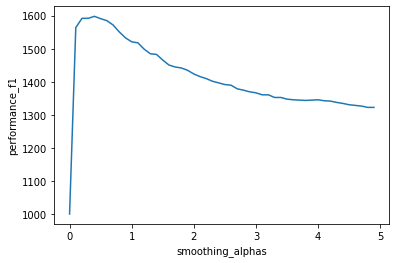

In [1574]:
pyt.plot(alphas,perf)
pyt.xlabel("smoothing_alphas")
pyt.ylabel("performance_f1")
_=pyt.show()

In [1572]:
performance

[(0.5934065934065934, 729, 272),
 (0.7389221556886227, 617, 947),
 (0.7437185929648241, 592, 1000),
 (0.7329842931937174, 560, 1032),
 (0.7283783783783785, 539, 1059),
 (0.7153792623521226, 514, 1077),
 (0.7025089605734768, 490, 1095),
 (0.6834319526627219, 462, 1110),
 (0.6564651874521805, 429, 1122),
 (0.6331500392772976, 403, 1130),
 (0.6164931945556444, 385, 1136),
 (0.6087662337662337, 375, 1143),
 (0.5862923203963666, 355, 1144),
 (0.5661331086773378, 336, 1149),
 (0.5584970111016225, 327, 1156),
 (0.5356521739130435, 308, 1158),
 (0.5137289636846767, 290, 1161),
 (0.5049063336306868, 283, 1162),
 (0.49910233393177733, 278, 1164),
 (0.48683015440508626, 268, 1167),
 (0.47155963302752296, 257, 1167),
 (0.4602587800369686, 249, 1167),
 (0.44652908067542213, 238, 1172),
 (0.4326375711574952, 228, 1174),
 (0.4240687679083095, 222, 1175),
 (0.41538461538461535, 216, 1176),
 (0.41005802707930367, 212, 1178),
 (0.3917727717923605, 200, 1179),
 (0.3842364532019705, 195, 1180),
 (0.376237

In [97]:
# test data
test_data=open("X_test.txt")
testx=[]
for line in test_data:
    line=tokenize(line)
    testx.append(line)
#testx_=[]
#for line in test_data:
 #   line=token_(line,bigram,unigram)
 #   testx_.append(line)

In [1749]:
dictFeatures,dictFeaturesYes,dictFeaturesNo,Yes,No,Total,tweets=train(trainx+devx,trainy+devy)
classes_nb=[]
for i in testx:
    classes_nb.append(classifier(i,dictFeaturesYes,dictFeaturesNo,Total,Yes,No,tweets,0.2))

In [1750]:
len(classes_nb)

8001

In [1554]:
import numpy as np
import pandas as pd
my_df = pd.DataFrame({"Id":list(range(8001)),"Category":classes})
my_df.to_csv('my_csv.csv', header=["Id","Category"],index=False)

In [16]:
# Logit regression
# We gonna use trainx_ trainy devx_ devy testx_
# Sigmoid X:numpy array (n*k) beta: parameters (k*1)
def sigmoid(X,beta):
    return 1/(1+np.exp(-csr_matrix.dot(X,np.transpose(beta))))

In [17]:
a=np.matrix([[1,2,3],[1,2,0]])
a=csr_matrix(a)
beta=np.matrix([0,2,1])
sigmoid(a,beta)
#csr_matrix.dot(a,np.transpose(beta))

matrix([[0.99908895],
        [0.98201379]])

In [114]:
# implement log-likelihood
def log_likelihood(X,Y,beta):
    Y=np.transpose(Y)
    #lr=lr+csr_matrix.dot(beta,np.transpose(X[i]))-np.log(1+np.exp(csr_matrix.dot(beta,np.transpose(X[i]))))
    lr=Y.dot(csr_matrix.dot(X,np.transpose(beta)))-sum(np.log(1+np.exp(csr_matrix.dot(X,np.transpose(beta)))))
    return lr

In [51]:
#def log_likelihood(X,Y,beta):
    #lr=lr+csr_matrix.dot(beta,np.transpose(X[i]))-np.log(1+np.exp(csr_matrix.dot(beta,np.transpose(X[i]))))
 #   lr=0
  #  for i in range(len(Y)):
   #     lr=lr+Y[i]*csr_matrix.dot(beta,np.transpose(X[i]))-np.log(1+np.exp(csr_matrix.dot(beta,np.transpose(X[i]))))
    #return lr

In [116]:
#log_likelihood(a,np.matrix([[2],[2]]),beta)

In [54]:
def computeGradient(x,y,beta):
# x is a single value and y is the corresponding
    # predicted y
    y_=sigmoid(x,beta)
    Gradient=(y-y_)*x
   # print(Gradient)
    return Gradient

In [55]:
import random
random.choice([1,2,3])

1

In [109]:
def logistic_regression(X,Y,beta,learning_rate,num_step):
    lr=[]
    for i in range(num_step):
       # print(1)
        j=random.choice(list(range(X.shape[0])))
        #print(2)
        beta=beta+learning_rate*computeGradient(X[j],Y[j],beta)
        if i%100==0:
            lr.append(float(log_likelihood(X,Y,beta)))
        #print(4)
    return beta,lr

In [67]:
x=np.matrix([[1,2,3],[1,0,0],[1,2,3],[1,0,1]])
beta=np.matrix([4,4,2])
Y=np.array([1,0,0,0])
beta,try_=logistic_regression(csr_matrix(x),Y,beta,0.1,1000)

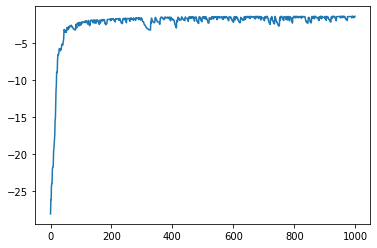

In [68]:
pyt.plot(try_)

In [1673]:
len(try_)

2000

In [1645]:
type(X)

numpy.matrix

In [1802]:
t="2,4,5,6,9,11,15;20"
str(15)
len(trainx)

10000

In [92]:
import collections
def createX(trainx,devx,testx):
    colnames=set()
    for i in trainx:
        for j in i: colnames.add(j)
    for i in devx:
        for j in i: colnames.add(j)
    for i in testx:
        for j in i: colnames.add(j)
    colnames=list(colnames)
    
    dim_x=len(trainx)
    dim_y=len(colnames)
    X_train=np.zeros([dim_x,dim_y])
    for i in range(dim_x):
        dict_temp=collections.defaultdict(int)
        for j in trainx[i]:
            dict_temp[j]+=1
        for j in range(dim_y):
            X_train[i][j]=dict_temp[colnames[j]]
    X_train=csr_matrix(X_train)
    
    dim_x1=len(devx)
    X_dev=np.zeros([dim_x1,dim_y])
    for i in range(dim_x1):
        dict_temp=collections.defaultdict(int)
        for j in devx[i]:
            dict_temp[j]+=1
        for j in range(dim_y):
            X_dev[i][j]=dict_temp[colnames[j]]
    X_dev=csr_matrix(X_dev)
    
    dim_x2=len(testx)
    X_test=np.zeros([dim_x2,dim_y])
    for i in range(dim_x2):
        dict_temp=collections.defaultdict(int)
        for j in testx[i]:
            dict_temp[j]+=1
        for j in range(dim_y):
            X_test[i][j]=dict_temp[colnames[j]]
    X_test=csr_matrix(X_test)
    
    return X_train,X_dev,X_test
    

In [14]:
from scipy.sparse import csr_matrix
a=np.matrix([[1,2,3]])
y=csr_matrix(a)
beta=csr_matrix(np.matrix([[1],[2],[3]]))
temp=np.dot(y,beta)
type(y)

scipy.sparse.csr.csr_matrix

In [93]:
def accuracy(classes,y):
    l,c=len(y),0
    c1,c2=0,0
    for i in range(l):
        if classes[i]==y[i]: 
            c+=1
            if classes[i]==1: c1+=1
            else: c2+=1
    return c/l,c1,c2

In [155]:
classes_dev=[]
for i in X_dev:
    classes_dev.append(predict(i,beta))
accuracy(classes_dev,devy)

(0.7835, 630, 937)

In [72]:
def func(a):
    if a>=0.5: return 1
    else: return 0
def predict(X,beta):
    temp=sigmoid(X,beta)
    fun=np.vectorize(func)
    return fun(temp)   

In [10]:
import numpy as np
# Create
c=np.matrix([[1],[2],[3]])
d=np.matrix([[2],[3],[4]])


In [98]:
X,X_dev,X_test=createX(trainx,devx,testx)

In [94]:
# convret y to array
y_train=np.array(trainy)
y_dev=np.array(devy)

In [128]:
beta=np.matrix(np.zeros(X.shape[1]))
#beta=csr_matrix(beta)
learning_rate=0.1
num_step=100000
#sigmoid(X,beta)
beta,lr=logistic_regression(X,y_train,beta,learning_rate,num_step)

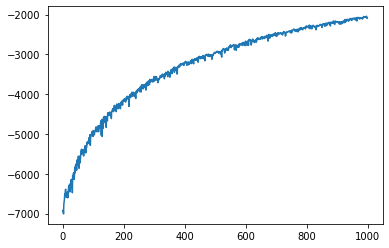

In [129]:
pyt.plot(lr)

In [153]:
beta_=np.matrix(np.zeros(X.shape[1]))
#beta=csr_matrix(beta)
learning_rate=0.01
num_step=1000
#sigmoid(X,beta)
beta_,lr_=logistic_regression(X,y_train,beta_,learning_rate,num_step)

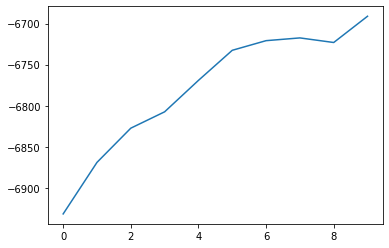

In [154]:
pyt.plot(lr_)

In [1836]:
#X_test=createX(testx,trainx,devx)
classes_test=[]
for i in X_test:
    classes_test.append(predict(i,paras))

In [1837]:
classes_=list()
for i in classes_test:
    classes_.append(int(i))

In [1838]:
my_df = pd.DataFrame({"Id":list(range(8001)),"Category":classes_})
my_df.to_csv('lr.csv', header=["Id","Category"],index=False)

In [1855]:
train_x=open("X_train.txt")
train_y=open("y_train.txt")
test_x=open("X_test.txt")
dev_x=open("X_dev.txt")
dev_y=open("y_dev.txt")
trainx_=list()
for line in train_x:
    line=better_tokenize(line)
    trainx_.append(line)
# Development
devx_,testx_=list(),list()
for line in dev_x:
    line=better_tokenize(line)
    devx_.append(line)
for line in test_x:
    line=better_tokenize(line)
    testx_.append(line)
X2,X2_dev,X2_test=createX(trainx_,devx_,testx_)

In [106]:
beta2=np.matrix(np.zeros(X2.shape[1]))
#beta=csr_matrix(beta)
learning_rate=0.8
num_step=20
#sigmoid(X,beta)
beta2=logistic_regression(X2,y_train,beta2,learning_rate,num_step)

NameError: name 'X2' is not defined

In [1860]:
classes_dev2=[]
for i in X2_dev:
    classes_dev2.append(predict(i,beta2))
accuracy(classes_dev2,devy)

(0.7615, 654, 869)

In [1862]:
classes_test2=[]
for i in X2_test:
    classes_test2.append(predict(i,beta2))
classes2_=list()
for i in classes_test2:
    classes2_.append(int(i))
my_df = pd.DataFrame({"Id":list(range(8001)),"Category":classes2_})
my_df.to_csv('lr2.csv', header=["Id","Category"],index=False)